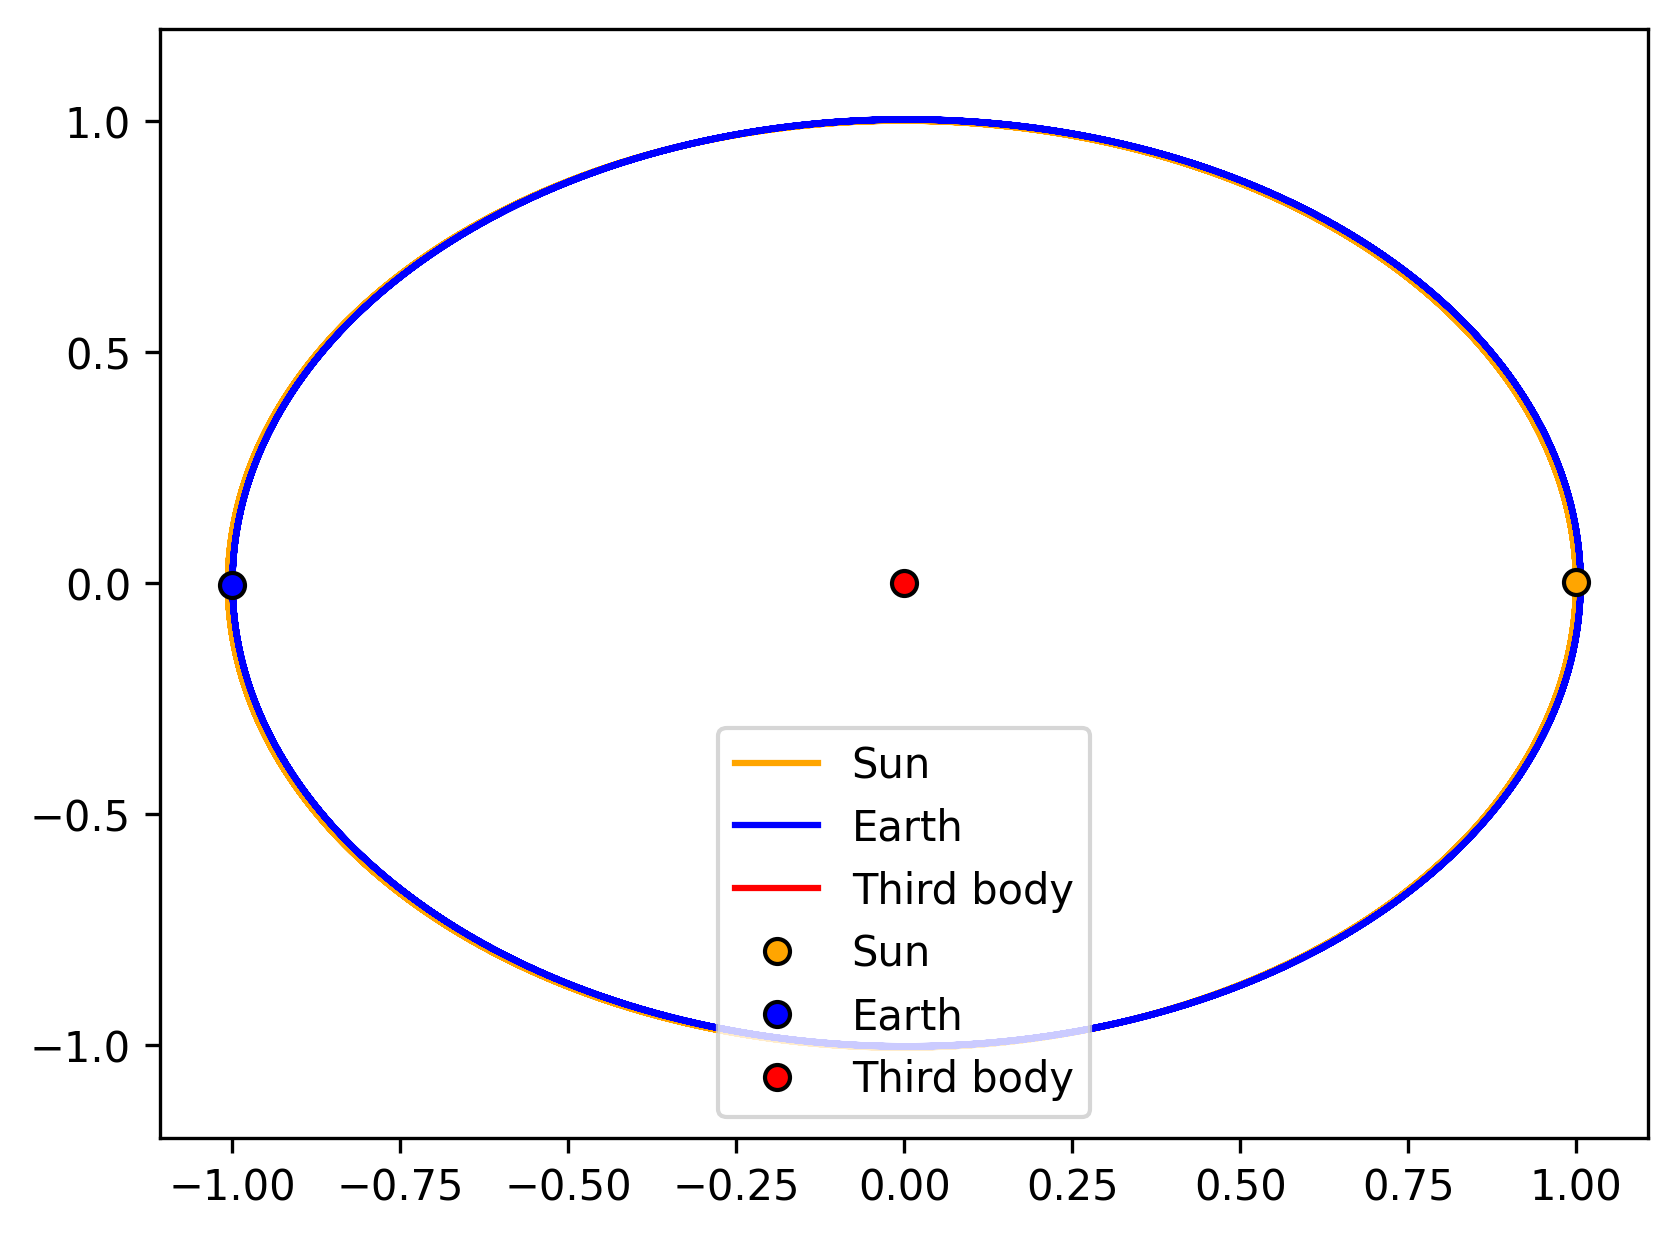

[9.99990162e-01 3.14159265e-03 1.38612696e-15]
[-9.99990162e-01 -3.14159265e-03  1.38612696e-15]
[0.         0.         0.99997228] 

[ 9.21292761e-01 -3.89656766e-01  7.89324711e-11]
[-9.21292761e-01  3.89656766e-01  7.89324711e-11]
[ 0.          0.         -0.57864942] 

1.0066544163165216
-1.0066544163165216
X-axis limits: (-1.1073198579481738, 1.1073198579481738)
Y-axis limits: (-1.2, 1.2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 39.5  # Gravitational constant in AU^3 / yr^2 / solar mass
m1, m2, m3 = 1.0, 3.00273e-6, 3.694e-8  # Masses of the Sun, Earth, Moon

# Let's fuck shit up
m1, m2, m3 = 1.0, 1.0, 10**-10

init_speed = np.pi
# Initial conditions: positions (AU) and velocities (AU/yr)
x1, y1, z1, vx1, vy1, vz1 = 1, 0, 0, 0, init_speed, 0  # Sun
x2, y2, z2, vx2, vy2, vz2 = -1, 0, 0, 0, -init_speed, 0  # Earth
x3, y3, z3, vx3, vy3, vz3 = 0, 0, 1, 0, 0, 0  # Third body 

# Time parameters
dt = 0.001  # Time step in years
total_time = 2*10  # Total simulation time in years
num_steps = int(total_time / dt)

# Arrays to store positions
positions = np.zeros((3, num_steps, 3))  # 3 bodies, num_steps, 3 dimensions (x, y, z)

dampening_factor = 0.1

# Main simulation loop
for i in range(num_steps):
    # Calculate distances and forces
    dx21, dy21, dz21 = x2 - x1, y2 - y1, z2 - z1  # Distance from body 1 to 2
    dx31, dy31, dz31 = x3 - x1, y3 - y1, z3 - z1  # Distance from body 1 to 3
    dx32, dy32, dz32 = x3 - x2, y3 - y2, z3 - z2  # Distance from body 2 to 3

    r21 = np.sqrt(dx21**2 + dy21**2 + dz21**2 + dampening_factor**2)
    r31 = np.sqrt(dx31**2 + dy31**2 + dz31**2 + dampening_factor**2)
    r32 = np.sqrt(dx32**2 + dy32**2 + dz32**2 + dampening_factor**2)

    # Force calculations
    F21 = -G * m1 * m2 / r21**2
    F31 = -G * m1 * m3 / r31**2
    F32 = -G * m2 * m3 / r32**2

    # Direction of forces
    Fx21, Fy21, Fz21 = F21 * dx21 / r21, F21 * dy21 / r21, F21 * dz21 / r21
    Fx31, Fy31, Fz31 = F31 * dx31 / r31, F31 * dy31 / r31, F31 * dz31 / r31
    Fx32, Fy32, Fz32 = F32 * dx32 / r32, F32 * dy32 / r32, F32 * dz32 / r32

    # Update velocities
    vx1 += dt * (-Fx21 - Fx31) / m1
    vy1 += dt * (-Fy21 - Fy31) / m1
    vz1 += dt * (-Fz21 - Fz31) / m1

    vx2 += dt * (Fx21 - Fx32) / m2
    vy2 += dt * (Fy21 - Fy32) / m2
    vz2 += dt * (Fz21 - Fz32) / m2

    vx3 += dt * (Fx31 + Fx32) / m3
    vy3 += dt * (Fy31 + Fy32) / m3
    vz3 += dt * (Fz31 + Fz32) / m3

    # Update positions
    x1 += vx1 * dt
    y1 += vy1 * dt
    z1 += vz1 * dt

    x2 += vx2 * dt
    y2 += vy2 * dt
    z2 += vz2 * dt

    x3 += vx3 * dt
    y3 += vy3 * dt
    z3 += vz3 * dt

    # Store positions for plotting
    positions[0, i] = [x1, y1, z1]
    positions[1, i] = [x2, y2, z2]
    positions[2, i] = [x3, y3, z3]


# Plotting (example for 2D plot)
fig, ax = plt.subplots(dpi=300)
# setting x and y axis range
# ax.set_xlim(0.5034289245962954, 2.6306549675947704)
ax.set_ylim(-1.2, 1.2)
ax.plot(positions[0, :, 0], positions[0, :, 1],label='Sun', color='orange')
#plt.plot([], [], 'o', color='yellow', markersize=50, markeredgecolor='orange', markeredgewidth=1)  # first body, larger dot
ax.plot(positions[1, :, 0], positions[1, :, 1], label='Earth' , color='blue')
ax.plot(positions[2, :, 0], positions[2, :, 1], label='Third body', color='red')

# Plotting starting positions
ax.plot(positions[0, 0, 0], positions[0, 0, 1], 'o', label='Sun', color='orange', markeredgecolor='black', markeredgewidth=1)
#plt.plot([], [], 'o', color='yellow', markersize=50, markeredgecolor='orange', markeredgewidth=1)  # first body, larger dot
ax.plot(positions[1, 0, 0], positions[1, 0, 1], 'o', label='Earth', color='blue', markeredgecolor='black', markeredgewidth=1)
ax.plot(positions[2, 0, 0], positions[2, 0, 1], 'o', label='Third body',  color='red', markeredgecolor='black', markeredgewidth=1)
plt.legend()
plt.show()


# Print starting and ending positions
print(positions[0, 0, :])
print(positions[1, 0, :])
print(positions[2, 0, :],'\n')
print(positions[0, -1, :])
print(positions[1, -1, :])
print(positions[2, -1, :],'\n')

# the highest value of any bodys position
print(np.max(positions))

# the lowest value of any bodys position
print(np.min(positions))

# Get the automatically set axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Display the limits
print(f"X-axis limits: {xlim}")
print(f"Y-axis limits: {ylim}")

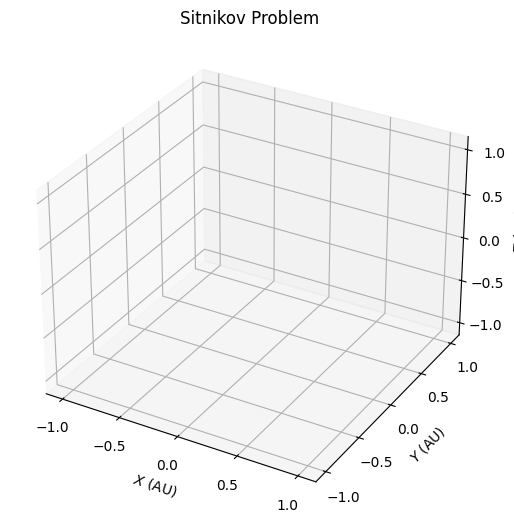

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#positions = np.zeros((3, num_steps, 3))  # 3 bodies, num_steps, 3 dimensions (x, y, z)

x1, y1, z1 = positions[0, :, 0], positions[0, :, 1], positions[0, :, 2]
x2, y2, z2 = positions[1, :, 0], positions[1, :, 1], positions[1, :, 2]
x3, y3, z3 = positions[2, :, 0], positions[2, :, 1], positions[2, :, 2]

# Initialize figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Customize the plot
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Remove padding
#ax.set_facecolor('black')  # Change background to black
#ax.set_axis_off()  # Remove the axes

# distance_range = np.max([abs(np.max(positions)), abs(np.min(positions))])   # AU range for visibility
# ax.set_xlim([-distance_range, distance_range])
# ax.set_ylim([-distance_range, distance_range])
# ax.set_zlim([-distance_range, distance_range])

# distance_pos = 3   # AU range for visibility
# distance_neg = 0.2
# ax.set_xlim([distance_neg, distance_pos])
# ax.set_ylim([distance_neg, distance_pos])
# ax.set_zlim([distance_neg, distance_pos])

limits = [-1.1, 1.1]
ax.set_xlim(limits)
ax.set_ylim(limits)
ax.set_zlim(limits)

# # Prepare lines for each body
# line1, = ax.plot([], [], [], 'o', label='Sun')
# line2, = ax.plot([], [], [], 'o', label='Earth')
# line3, = ax.plot([], [], [], 'o', label='Third body')

# Prepare lines for each body
line1, = ax.plot([], [], [], 'o', label='Planet 1', markeredgecolor='yellow', color='orange', markeredgewidth=1)
line2, = ax.plot([], [], [], 'o', label='Planet 2', markeredgecolor=(3/255, 236/255, 252/255), color='blue', markeredgewidth=1)
line3, = ax.plot([], [], [], 'o', label='Planet 3', markeredgecolor='lightgreen', color='green', markeredgewidth=1)

# prepare lines as tails for each body
line1_tail, = ax.plot([], [], [], '-', color='orange', markersize=1)  # first body
line2_tail, = ax.plot([], [], [], '-', color=('blue'), markersize=1)  # second body
line3_tail, = ax.plot([], [], [], '-', color='green', markersize=1)  # third body


# Set the axes labels
ax.set_xlabel(r'$X$ (AU)')
ax.set_ylabel(r'$Y$ (AU)')
ax.set_zlabel(r'$Z$ (AU)')

# Custom axis markers, 3 ticks each
ticks = 5
padding = 0.1
ax.set_xticks(np.linspace(limits[0] + padding, limits[1] - padding, ticks))
ax.set_yticks(np.linspace(limits[0] + padding, limits[1] - padding, ticks))
ax.set_zticks(np.linspace(limits[0] + padding, limits[1] - padding, ticks))

# Update function for animation
def update(frame, x1, y1, z1, x2, y2, z2, x3, y3, z3, line1, line2, line3):
    rel_frame = frame * (num_steps - 1) // (frame_number - 1)

    tail = 800 # length of the tail
    dot_cord = rel_frame + tail 
    
    # # Update the data of each line to animate them
    # line1.set_data(x1[rel_frame:rel_frame+tail], y1[rel_frame:rel_frame+tail])
    # line1.set_3d_properties(z1[rel_frame:rel_frame+tail])
    
    # line2.set_data(x2[rel_frame:rel_frame+tail], y2[rel_frame:rel_frame+tail])
    # line2.set_3d_properties(z2[rel_frame:rel_frame+tail])
    
    # line3.set_data(x3[rel_frame:rel_frame+tail], y3[rel_frame:rel_frame+tail])
    # line3.set_3d_properties(z3[rel_frame:rel_frame+tail])

    line1_tail.set_data(x1[rel_frame:rel_frame+tail], y1[rel_frame:rel_frame+tail])
    line1_tail.set_3d_properties(z1[rel_frame:rel_frame+tail])

    line2_tail.set_data(x2[rel_frame:rel_frame+tail], y2[rel_frame:rel_frame+tail])
    line2_tail.set_3d_properties(z2[rel_frame:rel_frame+tail])

    line3_tail.set_data(x3[rel_frame:rel_frame+int(tail*0.3)], y3[rel_frame:rel_frame+int(tail*0.3)])
    line3_tail.set_3d_properties(z3[rel_frame:rel_frame+int(tail*0.3)])

    # Update the data of each line to animate them
    line1.set_data(x1[dot_cord:dot_cord+1], y1[dot_cord:dot_cord+1])
    line1.set_3d_properties(z1[dot_cord:dot_cord+1])
    
    line2.set_data(x2[dot_cord:dot_cord+1], y2[dot_cord:dot_cord+1])
    line2.set_3d_properties(z2[dot_cord:dot_cord+1])
    
    c_dot_cord = int(dot_cord-0.7*tail)
    line3.set_data(x3[c_dot_cord:c_dot_cord+1], y3[c_dot_cord:c_dot_cord+1])
    line3.set_3d_properties(z3[c_dot_cord:c_dot_cord+1])


    return line1, line2, line3

frame_number = 120*8

ani = FuncAnimation(fig, update, frames=np.arange(0, frame_number), fargs=(x1, y1, z1, x2, y2, z2, x3, y3, z3, line1, line2, line3), interval=30, blit=True)

# plt.legend()
# HTML(ani.to_jshtml())
ani.save('3BP_presentation.gif', writer='pillow', fps=30)